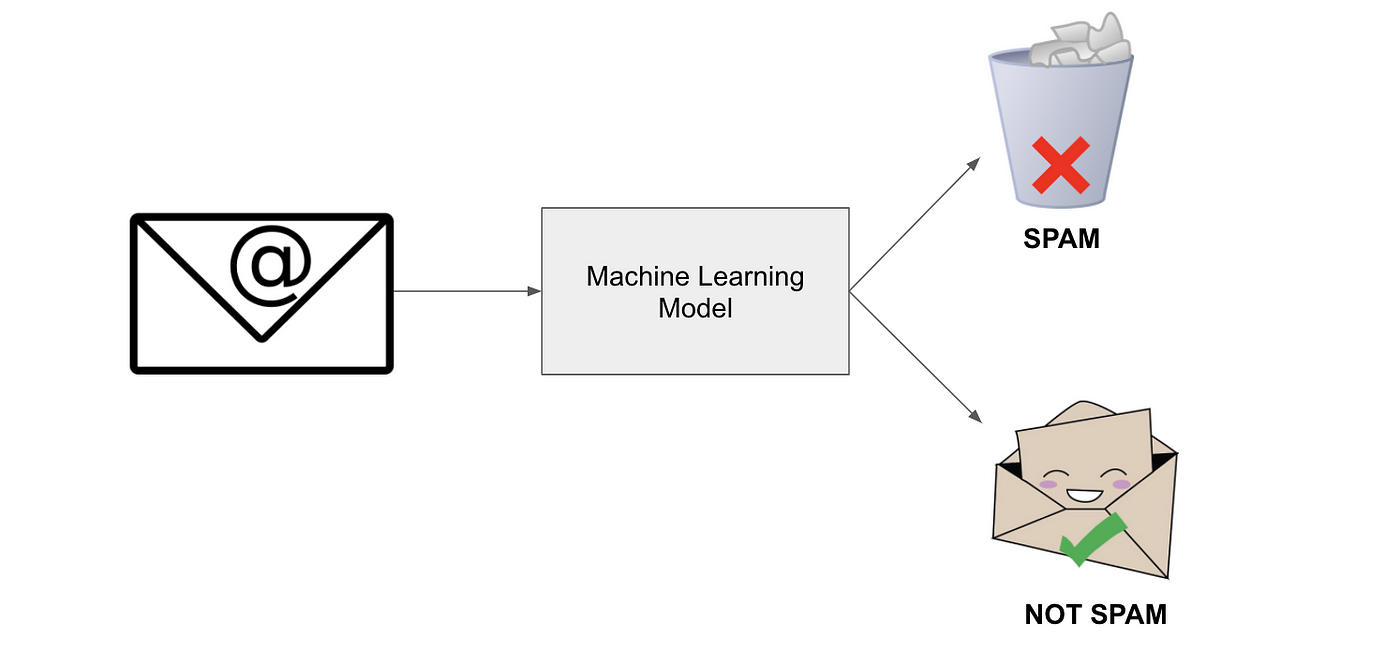

# Introduction
This Kaggle notebook presents a step-by-step guide to building an efficient SMS spam classification model using the SMS Spam Collection dataset. By the end of this notebook, you'll have a powerful tool to help you filter out unwanted messages and ensure that your text messaging experience is smoother and safer.

# Problem Statement
The primary goal of this notebook is to develop a predictive model that accurately classifies incoming SMS messages as either ham or spam. We will use the SMS Spam Collection dataset, which consists of 5,574 SMS messages tagged with their respective labels.

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']= [10,5]

# Loading dataset


In [2]:
df = pd.read_csv('/content/spam.csv', encoding='latin1')


In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
#drop unnecessary columns

df= df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1)

In [7]:
#renaming columns names

df= df.rename(columns = {'v1': 'target', 'v2': 'text'})

In [8]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
# checking missing value

df.isnull().sum()

target    0
text      0
dtype: int64

In [10]:
df.duplicated().sum()

403

In [11]:
df = df.drop_duplicates()

In [12]:
df.shape

(5169, 2)

# Data Visualization

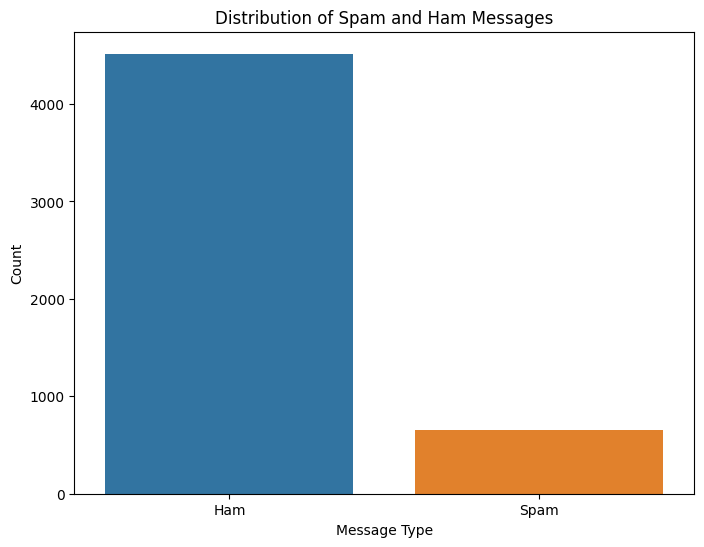

In [16]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='target')
plt.xlabel('Message Type')
plt.ylabel('Count')
plt.title('Distribution of Spam and Ham Messages')
plt.xticks([0, 1], ['Ham', 'Spam'])
plt.show()

Text(0.5, 1.0, 'Percentage of Spam and Ham Messages')

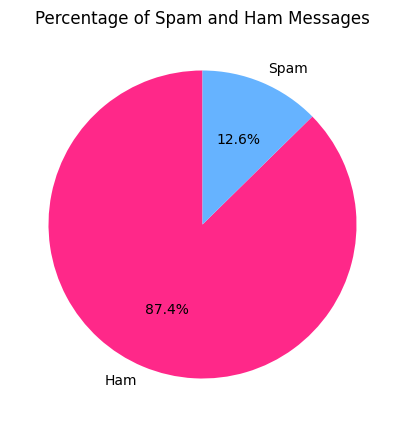

In [18]:
spam_count = df['target'].value_counts()[1]
ham_count = df['target'].value_counts()[0]

labels = ['Ham', 'Spam']
sizes = [ham_count, spam_count]
colors = ['#ff2889', '#66b3ff']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Spam and Ham Messages')

# Train Test Spliting

In [20]:
X = df['text']
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# TF-IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [23]:
# Train a Naive Bayes classifier

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

MultinomialNB()

In [24]:
# Predict on the test set
y_pred = nb_classifier.predict(X_test_tfidf)

# Model Evaluation

In [26]:
# Evaluate the model
accuracy = round(accuracy_score(y_test, y_pred)*100,2)
print('Accuracy of the Naive Bayes classifier is: ',accuracy)

Accuracy of the Naive Bayes classifier is:  95.55


In [27]:
#report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         ham       0.95      1.00      0.97       889
        spam       1.00      0.68      0.81       145

    accuracy                           0.96      1034
   macro avg       0.98      0.84      0.89      1034
weighted avg       0.96      0.96      0.95      1034



# Logistic Regression


In [29]:
model = LogisticRegression()

In [30]:
model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [31]:
y_pred = model.predict(X_test_tfidf)

In [34]:
accuracy= round(accuracy_score(y_test, y_pred)*100,2)

print('Accuracy of the Logistic Regression Model is: ',accuracy)

Accuracy of the Logistic Regression Model is:  96.81


# Support Vector Machines

In [35]:
from sklearn.svm import SVC

In [37]:
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)

In [38]:
#Fit the SVM model on the TF-IDF training data and labels
svm_classifier.fit(X_train_tfidf, y_train)

# Predict on the TF-IDF test data
y_pred_svm = svm_classifier.predict(X_test_tfidf)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)

In [39]:
# Evaluate the SVM model
accuracy_svm = round(accuracy_score(y_test, y_pred_svm)*100,2)

In [40]:
print('Accuracy of the SVM is: ',accuracy_svm)

Accuracy of the SVM is:  98.65
